In [1]:
#Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [55]:
#read the application data and display top 5 rows
leads_score_data=pd.read_csv("Leads.csv",sep=",",encoding='utf-8')
leads_score_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [56]:
#number of rows and columns in the data

leads_score_data.shape

(9240, 37)

In [57]:
#displaying the detailed information like column names and non-null counts

leads_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [58]:
#null values in leads score data
def null_values_percentage(dataframe):
    return round(dataframe.isnull().sum()/len(dataframe.index)*100,3)

In [60]:
missing=null_values_percentage(leads_score_data)
print(missing)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [61]:
# Converting 'Select' values to Not Known.
leads_score_data = leads_score_data.replace('Select','Not Known')

In [62]:
leads_score_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [63]:
# Creating a new category called 'Not Known' for Lead Quality
leads_score_data['Lead Quality'] = leads_score_data['Lead Quality'].replace(np.nan, 'Not Known')

In [64]:
print(null_values_percentage(leads_score_data))

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [65]:
#drop irrelevant columns
irrelavant_columns = ['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
leads_score_data.drop(columns=irrelavant_columns, axis=1, inplace=True)

In [66]:
#convert the values in the column and replace null values
leads_score_data['Asymmetrique Activity Index'] = leads_score_data['Asymmetrique Activity Index'].apply(lambda x:3 if pd.isnull(x) else x).apply(lambda x: 1 if x == '01.High' else (2 if x == '02.Medium' else 3))

In [67]:
# Value counts for 'Asymmetrique Activity Index'
leads_score_data['Asymmetrique Activity Index'].value_counts()

3    4580
2    3839
1     821
Name: Asymmetrique Activity Index, dtype: int64

In [68]:
# Null values in 'leads_score_data'
print(null_values_percentage(leads_score_data))

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [69]:
#converting all the null values to Not known having more than 15% null values

null_data=null_values_percentage(leads_score_data)
columns_to_fill = null_data[null_data >= 15].index
leads_score_data[columns_to_fill] = leads_score_data[columns_to_fill].fillna('Not known')

In [70]:
# Null values in 'leads data'
print(null_values_percentage(leads_score_data))

Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.390
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.483
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.483
Last Activity                                    1.115
Country                                          0.000
Specialization                                   0.000
How did you hear about X Education               0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Magazine                                         0.000
Newspaper 

In [71]:
#dropping the data having null values under 2%

leads_score_data=leads_score_data.dropna()

In [73]:
# Null values in 'leads data'
print(null_values_percentage(leads_score_data))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [74]:
leads_score_data.shape

(9074, 34)

In [75]:
#displaying the detailed information like column names and non-null counts
leads_score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [77]:
#imbalance
imbalance = leads_score_data['Converted'].value_counts(normalize=True) * 100
print(imbalance)

0    62.144589
1    37.855411
Name: Converted, dtype: float64


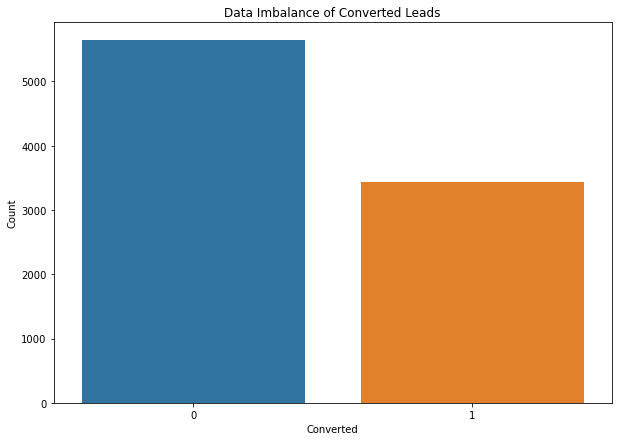

In [79]:
#plot for displaying data imbalance

plt.figure(figsize=(10, 7))
sns.countplot(x='Converted',data=leads_score_data)
plt.title('Data Imbalance of Converted Leads')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

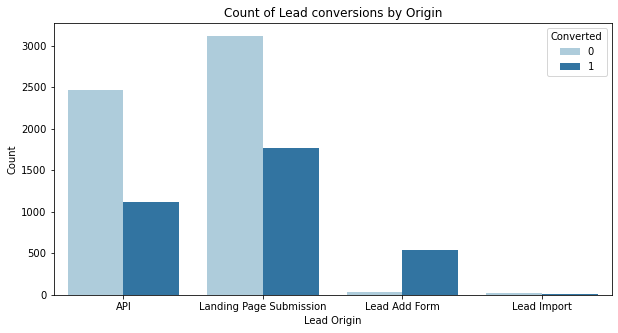

In [81]:
#plot for data imbalance wrt Leads origin
plt.figure(figsize=(10, 5))
sns.countplot(x='Lead Origin',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.show()

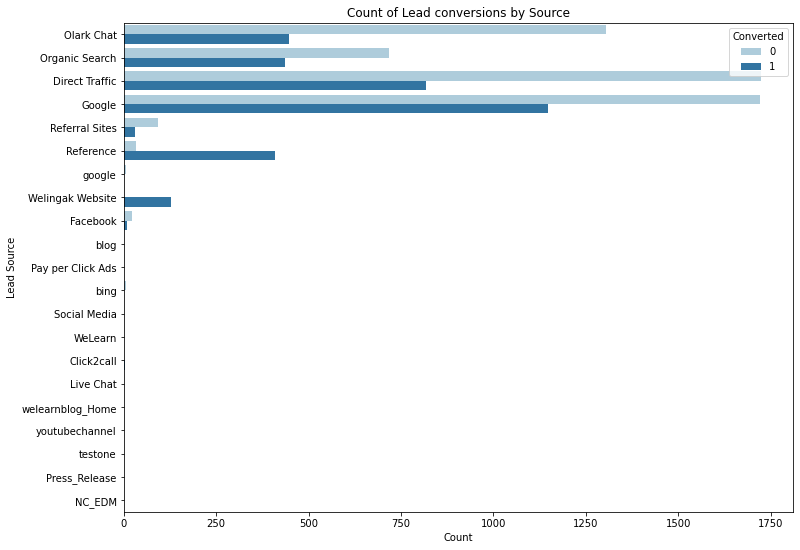

In [82]:
#plot for data imbalance wrt Leads source
plt.figure(figsize=(12, 9))
sns.countplot(y='Lead Source',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Source')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.show()

In [83]:
# Replacing 'google' with 'Google'
leads_score_data.loc[leads_score_data['Lead Source'] == 'google', 'Lead Source'] = 'Google'
# Creating a new Category for all the categories with less value
categories_to_replace = ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                         'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel']
leads_score_data.loc[leads_score_data['Lead Source'].isin(categories_to_replace), 'Lead Source'] = 'Others'


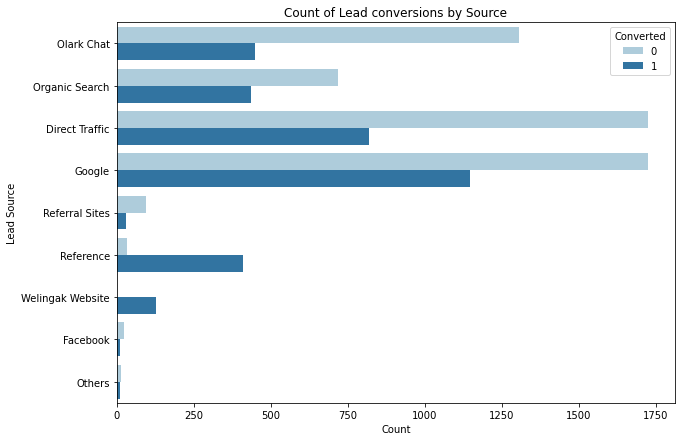

In [85]:
#plot for data imbalance wrt Leads source
plt.figure(figsize=(10, 7))
sns.countplot(y='Lead Source',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Source')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.show()

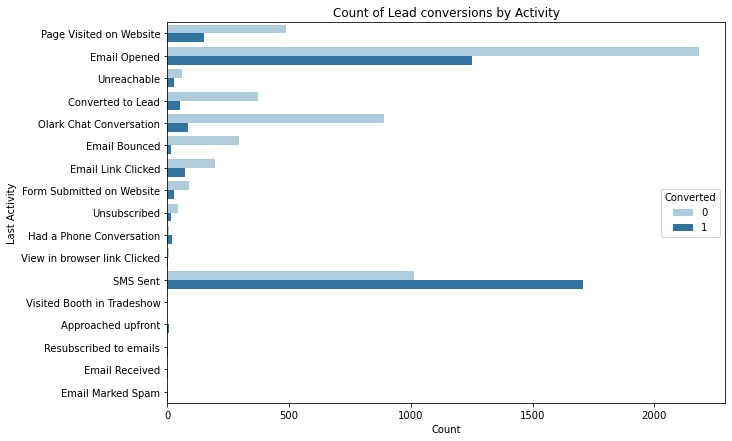

In [86]:
#plot for data imbalance wrt Last Activity
plt.figure(figsize=(10, 7))
sns.countplot(y='Last Activity',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Activity')
plt.xlabel('Count')
plt.ylabel('Last Activity')
plt.show()

In [87]:
# Converting last activities to "Other_Activity" which are having less data.
activities_to_replace = ['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam']
leads_score_data.loc[leads_score_data['Last Activity'].isin(activities_to_replace), 'Last Activity'] = 'Other_Activity'

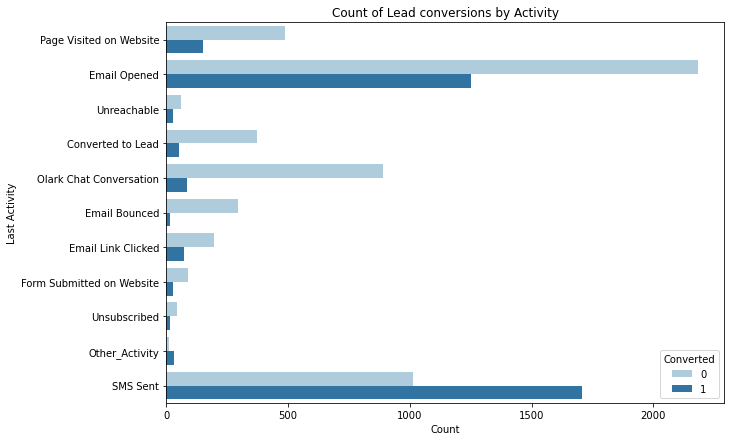

In [89]:
#plot for data imbalance wrt Last Activity
plt.figure(figsize=(10, 7))
sns.countplot(y='Last Activity',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Activity')
plt.xlabel('Count')
plt.ylabel('Last Activity')
plt.show()

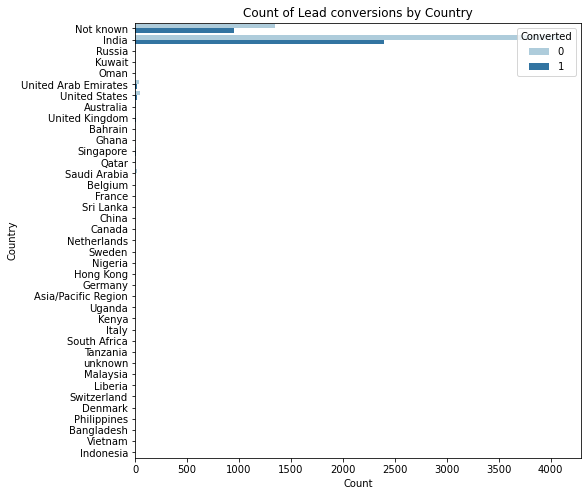

In [90]:
#plot for data imbalance wrt Country
plt.figure(figsize=(8, 8))
sns.countplot(y='Country',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

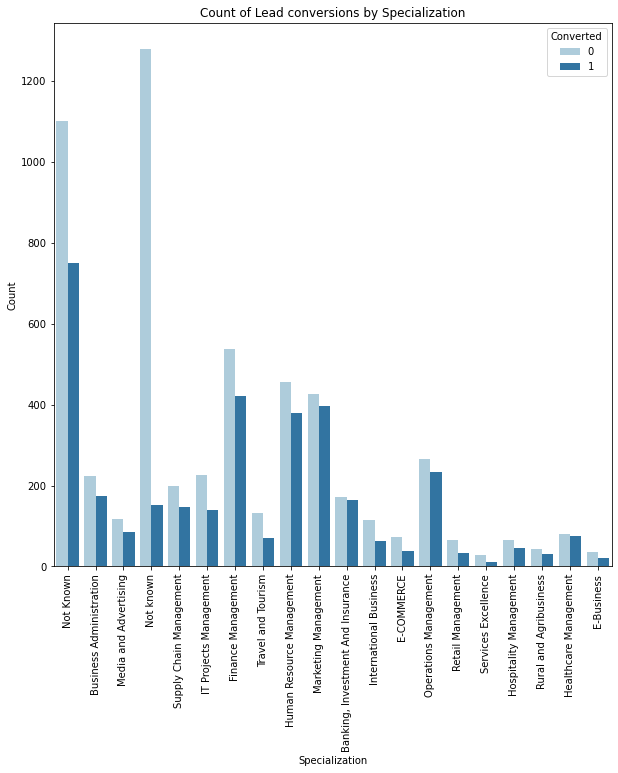

In [92]:
#plot for data imbalance wrt Specialization
plt.figure(figsize=(10, 10))
sns.countplot(x='Specialization',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

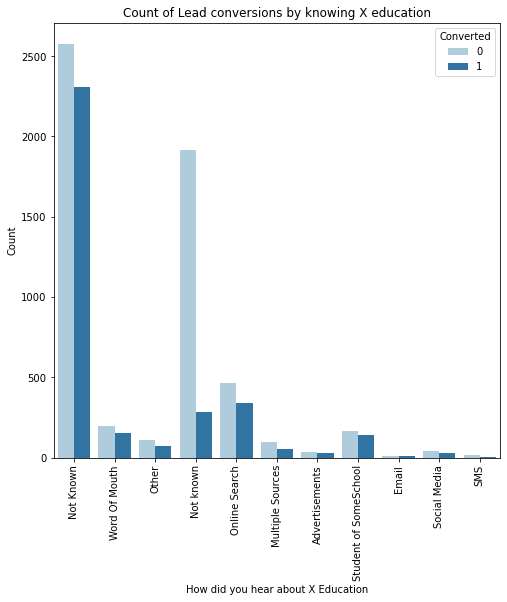

In [93]:
#plot for data imbalance wrt How did you hear
plt.figure(figsize=(8, 8))
sns.countplot(x='How did you hear about X Education',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by knowing X education')
plt.xlabel('How did you hear about X Education')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

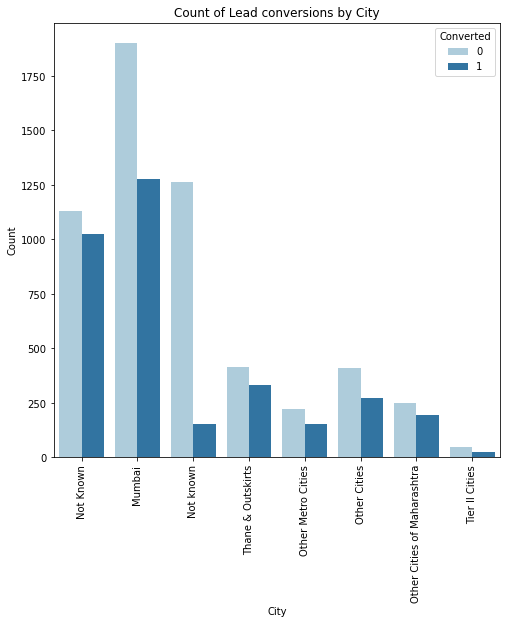

In [94]:
#plot for data imbalance wrt City
plt.figure(figsize=(8, 8))
sns.countplot(x='City',data=leads_score_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

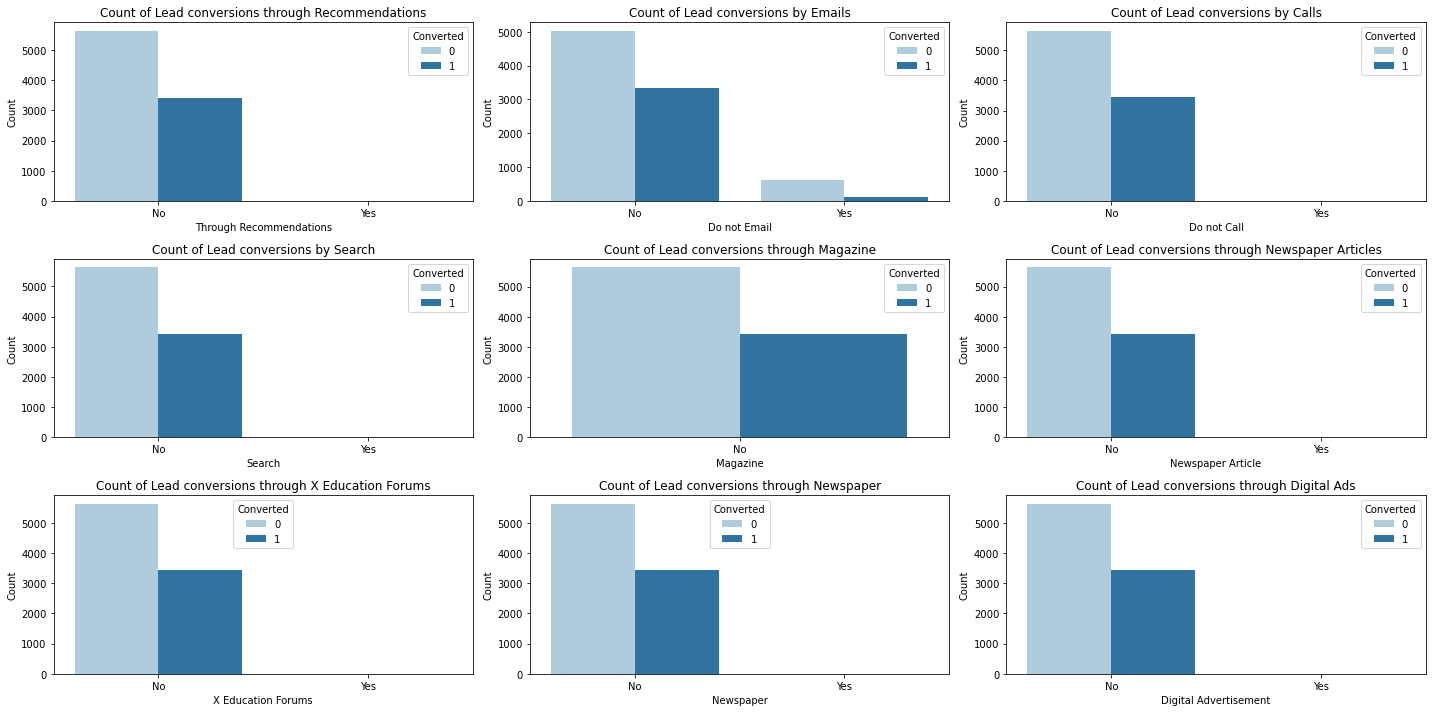

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
sns.countplot(x='Through Recommendations',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,0])
axes[0,0].set_title('Count of Lead conversions through Recommendations')
axes[0,0].set_xlabel('Through Recommendations')
axes[0,0].set_ylabel('Count')

sns.countplot(x='Do Not Email',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,1])
axes[0,1].set_title('Count of Lead conversions by Emails')
axes[0,1].set_xlabel('Do not Email')
axes[0,1].set_ylabel('Count')

sns.countplot(x='Do Not Call',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,2])
axes[0,2].set_title('Count of Lead conversions by Calls')
axes[0,2].set_xlabel('Do not Call')
axes[0,2].set_ylabel('Count')

sns.countplot(x='Search',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,0])
axes[1,0].set_title('Count of Lead conversions by Search')
axes[1,0].set_xlabel('Search')
axes[1,0].set_ylabel('Count')

sns.countplot(x='Magazine',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,1])
axes[1,1].set_title('Count of Lead conversions through Magazine')
axes[1,1].set_xlabel('Magazine')
axes[1,1].set_ylabel('Count')

sns.countplot(x='Newspaper Article',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,2])
axes[1,2].set_title('Count of Lead conversions through Newspaper Articles')
axes[1,2].set_xlabel('Newspaper Article')
axes[1,2].set_ylabel('Count')

sns.countplot(x='X Education Forums',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[2,0])
axes[2,0].set_title('Count of Lead conversions through X Education Forums')
axes[2,0].set_xlabel('X Education Forums')
axes[2,0].set_ylabel('Count')

sns.countplot(x='Newspaper',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[2,1])
axes[2,1].set_title('Count of Lead conversions through Newspaper')
axes[2,1].set_xlabel('Newspaper')
axes[2,1].set_ylabel('Count')

sns.countplot(x='Digital Advertisement',data=leads_score_data,hue="Converted", palette='Paired', ax=axes[2,2])
axes[2,2].set_title('Count of Lead conversions through Digital Ads')
axes[2,2].set_xlabel('Digital Advertisement')
axes[2,2].set_ylabel('Count')

plt.tight_layout()  # Adjust layout
plt.show()

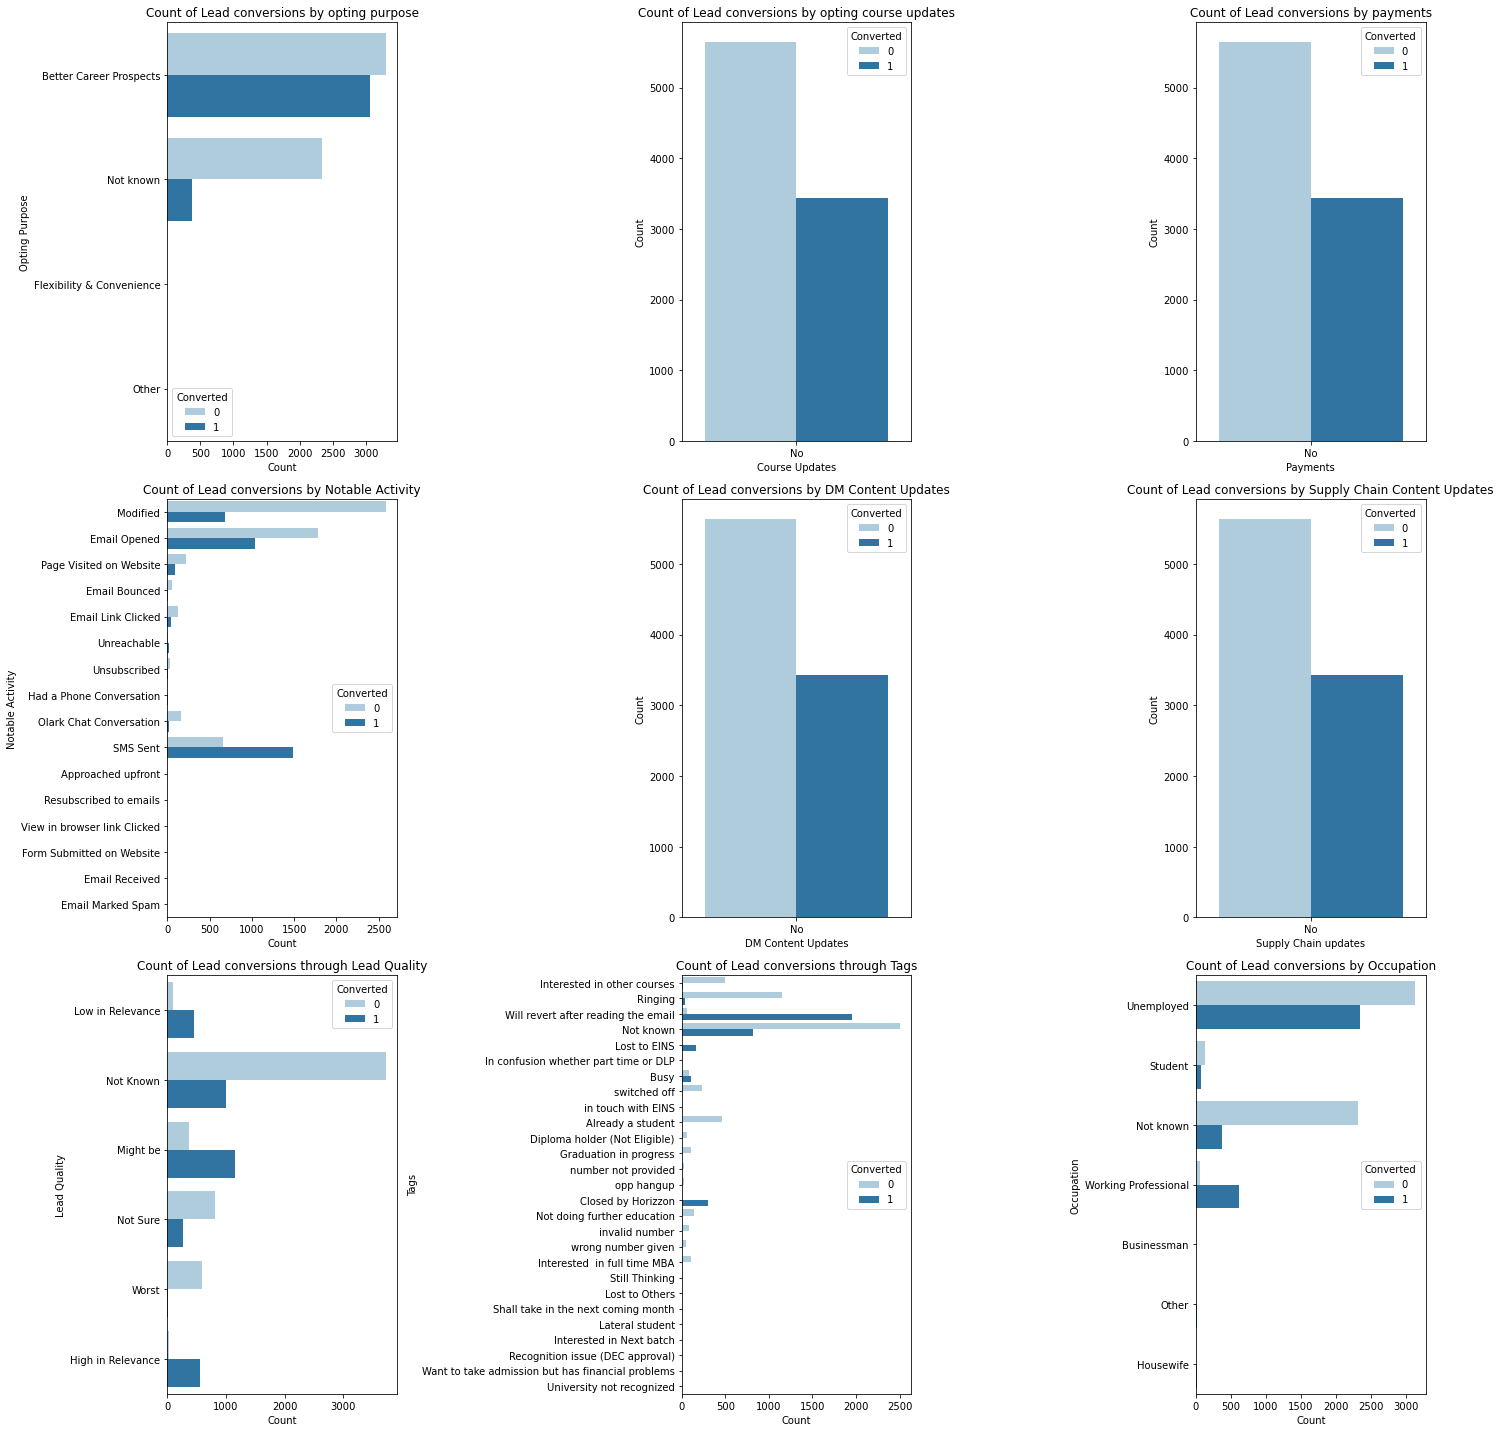

In [96]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(y='What matters most to you in choosing a course',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,0])
axes[0,0].set_title('Count of Lead conversions by opting purpose')
axes[0,0].set_xlabel('Count')
axes[0,0].set_ylabel('Opting Purpose')

sns.countplot(x='Receive More Updates About Our Courses',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,1])
axes[0,1].set_title('Count of Lead conversions by opting course updates')
axes[0,1].set_xlabel('Course Updates')
axes[0,1].set_ylabel('Count')

sns.countplot(x='I agree to pay the amount through cheque',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[0,2])
axes[0,2].set_title('Count of Lead conversions by payments')
axes[0,2].set_xlabel('Payments')
axes[0,2].set_ylabel('Count')

sns.countplot(y='Last Notable Activity',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,0])
axes[1,0].set_title('Count of Lead conversions by Notable Activity')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Notable Activity')

sns.countplot(x='Get updates on DM Content',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,1])
axes[1,1].set_title('Count of Lead conversions by DM Content Updates')
axes[1,1].set_xlabel('DM Content Updates')
axes[1,1].set_ylabel('Count')

sns.countplot(x='Update me on Supply Chain Content',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[1,2])
axes[1,2].set_title('Count of Lead conversions by Supply Chain Content Updates')
axes[1,2].set_xlabel('Supply Chain updates')
axes[1,2].set_ylabel('Count')

sns.countplot(y='Lead Quality',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[2,0])
axes[2,0].set_title('Count of Lead conversions through Lead Quality')
axes[2,0].set_xlabel('Count')
axes[2,0].set_ylabel('Lead Quality')

sns.countplot(y='Tags',data=leads_score_data,hue="Converted", palette='Paired',ax=axes[2,1])
axes[2,1].set_title('Count of Lead conversions through Tags')
axes[2,1].set_xlabel('Count')
axes[2,1].set_ylabel('Tags')

sns.countplot(y='What is your current occupation',data=leads_score_data,hue="Converted", palette='Paired', ax=axes[2,2])
axes[2,2].set_title('Count of Lead conversions by Occupation')
axes[2,2].set_xlabel('Count')
axes[2,2].set_ylabel('Occupation')

plt.tight_layout()  # Adjust layout
plt.show()

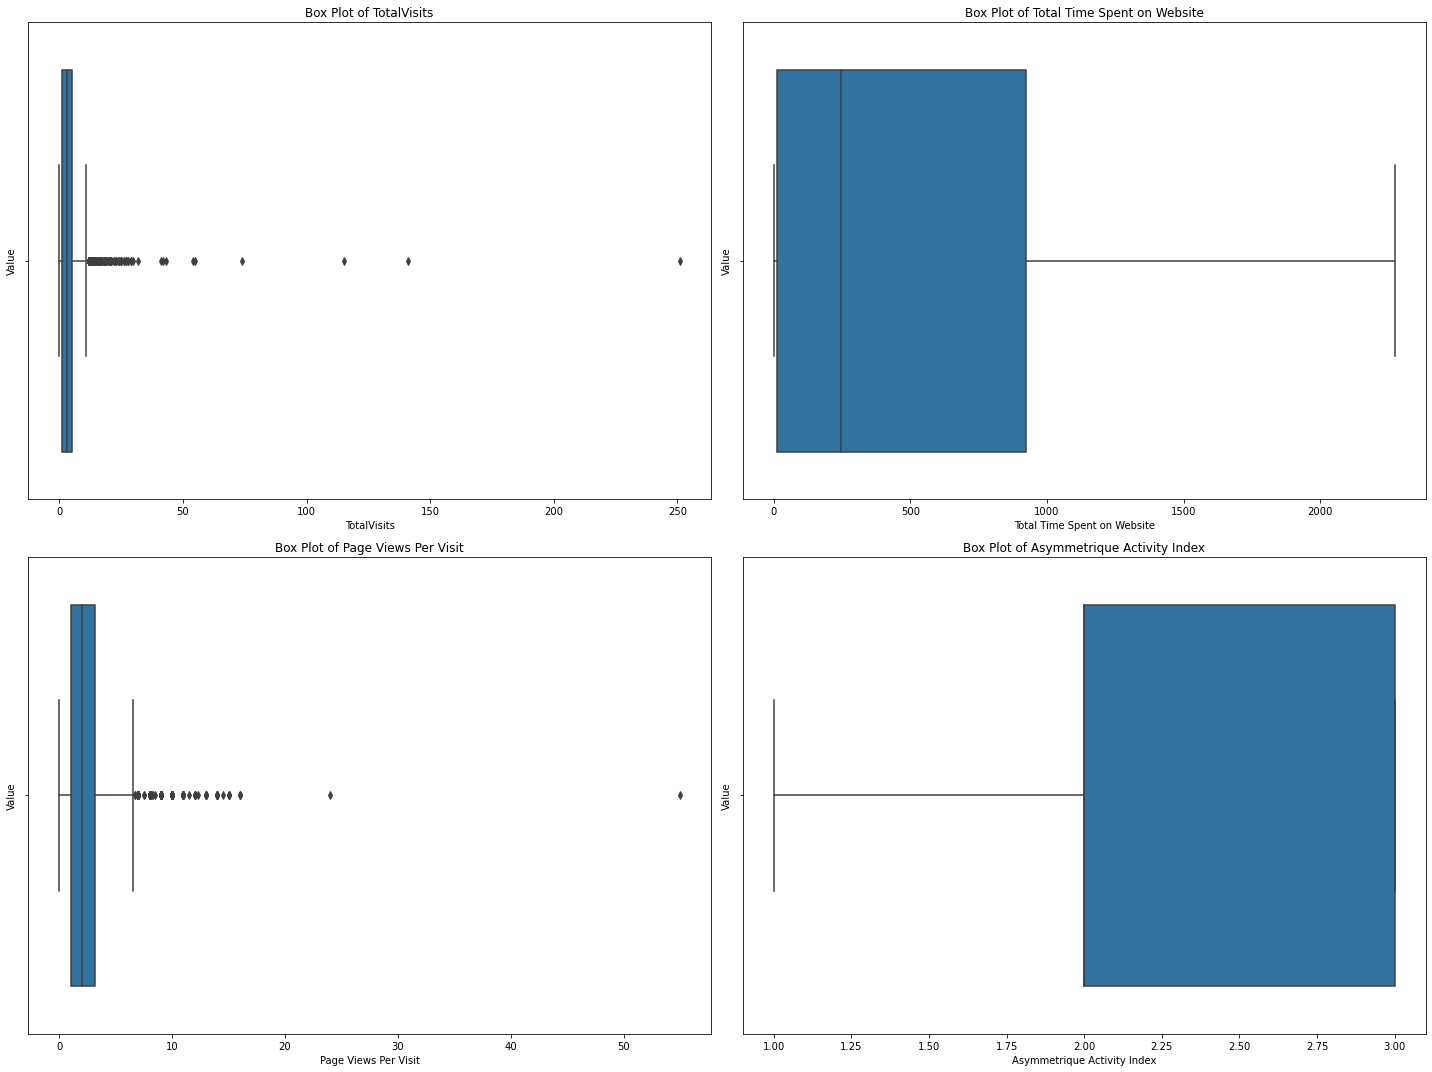

In [97]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Box plot for TotalVisits
sns.boxplot(x='TotalVisits', data=leads_score_data, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of TotalVisits')
axes[0, 0].set_xlabel('TotalVisits')
axes[0, 0].set_ylabel('Value')

# Box plot for Total Time Spent on Website
sns.boxplot(x='Total Time Spent on Website', data=leads_score_data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Total Time Spent on Website')
axes[0, 1].set_xlabel('Total Time Spent on Website')
axes[0, 1].set_ylabel('Value')

# Box plot for Page Views Per Visit
sns.boxplot(x='Page Views Per Visit', data=leads_score_data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Page Views Per Visit')
axes[1, 0].set_xlabel('Page Views Per Visit')
axes[1, 0].set_ylabel('Value')

# Box plot for Asymmetrique Activity Index
sns.boxplot(x='Asymmetrique Activity Index', data=leads_score_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Asymmetrique Activity Index')
axes[1, 1].set_xlabel('Asymmetrique Activity Index')
axes[1, 1].set_ylabel('Value')


plt.tight_layout()
plt.show()

In [98]:
percentiles = leads_score_data['TotalVisits'].quantile([0.05, 0.95]).values
leads_score_data['TotalVisits'] = np.clip(leads_score_data['TotalVisits'], percentiles[0], percentiles[1])

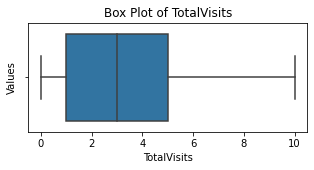

In [99]:

plt.figure(figsize=(5, 2))
sns.boxplot(x='TotalVisits',data=leads_score_data)
plt.title('Box Plot of TotalVisits')
plt.xlabel('TotalVisits')
plt.ylabel('Values')
plt.show()

In [100]:
percentiles = leads_score_data['Page Views Per Visit'].quantile([0.05, 0.95]).values
leads_score_data['Page Views Per Visit'] = np.clip(leads_score_data['Page Views Per Visit'], percentiles[0], percentiles[1])

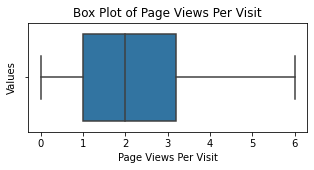

In [101]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='Page Views Per Visit',data=leads_score_data)
plt.title('Box Plot of Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Values')
plt.show()

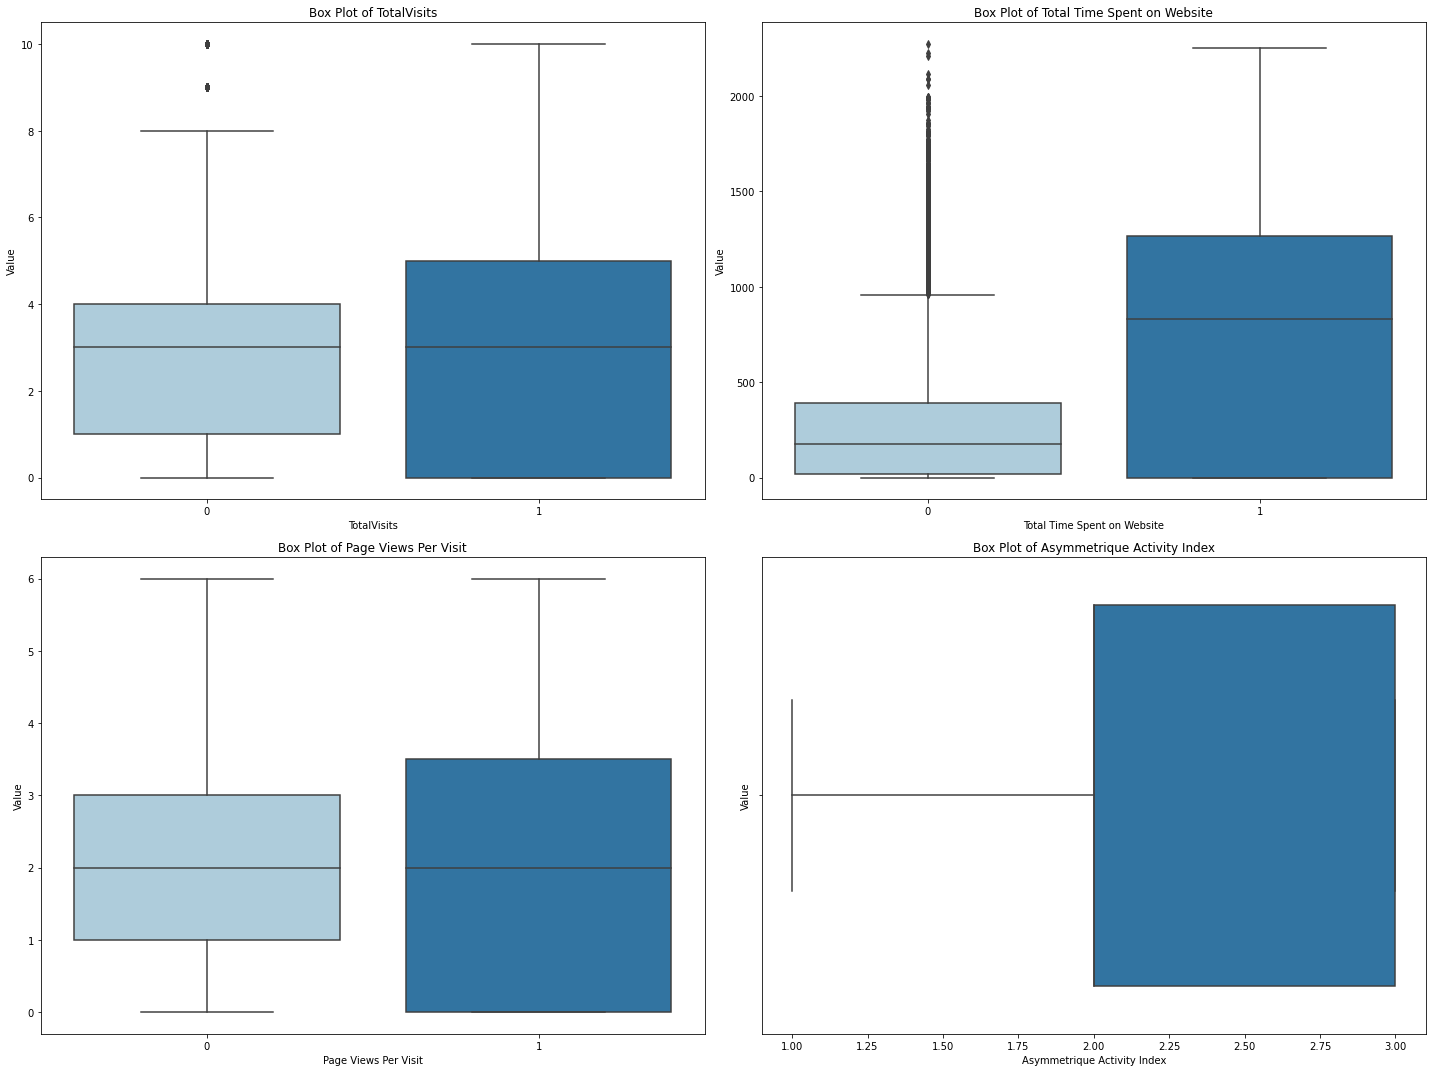

In [102]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Box plot for TotalVisits
sns.boxplot(y='TotalVisits',x = 'Converted', data=leads_score_data,palette='Paired', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of TotalVisits')
axes[0, 0].set_xlabel('TotalVisits')
axes[0, 0].set_ylabel('Value')

# Box plot for Total Time Spent on Website
sns.boxplot(y='Total Time Spent on Website',x = 'Converted', data=leads_score_data,palette='Paired', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Total Time Spent on Website')
axes[0, 1].set_xlabel('Total Time Spent on Website')
axes[0, 1].set_ylabel('Value')

# Box plot for Page Views Per Visit
sns.boxplot(y='Page Views Per Visit',x = 'Converted', data=leads_score_data,palette='Paired', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Page Views Per Visit')
axes[1, 0].set_xlabel('Page Views Per Visit')
axes[1, 0].set_ylabel('Value')

# Box plot for Asymmetrique Activity Index
sns.boxplot(x='Asymmetrique Activity Index', data=leads_score_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Asymmetrique Activity Index')
axes[1, 1].set_xlabel('Asymmetrique Activity Index')
axes[1, 1].set_ylabel('Value')


plt.tight_layout()
plt.show()

In [103]:
irrelavant_columns=['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview']
leads_score_data.drop(columns=irrelavant_columns, axis=1, inplace=True)

In [105]:
leads_score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [106]:
leads_score_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified


In [107]:
leads_score_data.shape

(9074, 19)

In [108]:
# Dropping 'Prospect ID' because that column is irrelevant
leads_score_data.drop(columns="Prospect ID", axis=1, inplace=True)

In [109]:
leads_score_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified


In [110]:
# Getting list of columns with categorical variables
cat_cols= leads_score_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [111]:
# Value counts for 'Lead Origin'
leads_score_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [112]:
# Creating dummy for 'Lead Origin'
d = pd.get_dummies(leads_score_data['Lead Origin'], prefix='Lead Origin', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Lead Origin", axis=1, inplace=True)
leads_score_data.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0
1,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0
2,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0
3,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0
4,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0


In [113]:
# Value counts for 'Lead Source'
leads_score_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [114]:
# Creating dummy for 'Lead Source'
d = pd.get_dummies(leads_score_data['Lead Source'], prefix='Lead Source', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Lead Source", axis=1, inplace=True)
leads_score_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,No,No,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0
1,No,No,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0
2,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0
4,No,No,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0


In [115]:
# Value counts for 'Do Not Email'
leads_score_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [116]:
# Creating dummy variables for 'Do Not Email'
d = pd.get_dummies(leads_score_data['Do Not Email'], prefix='Do Not Email', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Do Not Email", axis=1, inplace=True)
leads_score_data.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes
0,No,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0
1,No,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0
2,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0


In [117]:
leads_score_data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [118]:
# Creating dummy variables for 'Do Not call'
d = pd.get_dummies(leads_score_data['Do Not Call'], prefix='Do Not Call', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Do Not Call", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes
0,0,0.0,0,0.0,Page Visited on Website,Not Known,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Not Known,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Business Administration,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Not Known,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0


In [119]:
leads_score_data['Specialization'].value_counts()

Not Known                            1851
Not known                            1431
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [120]:
# Creating dummy variables for 'Specialization'
d = pd.get_dummies(leads_score_data['Specialization'], prefix='Specialization', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Specialization", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Page Visited on Website,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unreachable,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [121]:
leads_score_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64

In [122]:
# Creating dummy variables for 'Last Activity'
d = pd.get_dummies(leads_score_data['Last Activity'], prefix='Last Activity', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Last Activity", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0.0,0,0.0,Not Known,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,Not Known,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Not Known,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Other,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
leads_score_data['How did you hear about X Education'].value_counts()

Not Known                4886
Not known                2200
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [124]:
# Creating dummy variables for 'How did you hear about X Education'
d = pd.get_dummies(leads_score_data['How did you hear about X Education'], prefix='How did you hear about X Education', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="How did you hear about X Education", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,0,0.0,0,0.0,Unemployed,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Unemployed,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unemployed,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,2.0,1428,1.0,Unemployed,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [125]:
leads_score_data['What is your current occupation'].value_counts()

Unemployed              5476
Not known               2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [126]:
# Creating dummy variables for 'What is your current occupation'
d = pd.get_dummies(leads_score_data['What is your current occupation'], prefix='What is your current occupation', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="What is your current occupation", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,Better Career Prospects,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Better Career Prospects,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,Better Career Prospects,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,2.0,1428,1.0,Better Career Prospects,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [127]:
leads_score_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Not known                    2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [128]:
# Creating dummy variables for 'What matters most to you in choosing a course'
d = pd.get_dummies(leads_score_data['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="What matters most to you in choosing a course", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other
0,0,0.0,0,0.0,Low in Relevance,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,Not Known,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Not Sure,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,Might be,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [129]:
leads_score_data['Lead Quality'].value_counts()

Not Known            4720
Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [130]:
# Creating dummy variables for 'Lead Quality'
d = pd.get_dummies(leads_score_data['Lead Quality'], prefix='Lead Quality', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Lead Quality", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Known,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0.0,0,0.0,Not Known,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,Not Known,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,Not Known,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Not Known,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [131]:
leads_score_data['Lead Profile'].value_counts()

Not Known                      4055
Not known                      2702
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [132]:
# Creating dummy variables for 'Lead Profile'
d = pd.get_dummies(leads_score_data['Lead Profile'], prefix='Lead Profile', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Lead Profile", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Known,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Not Known,Lead Profile_Not known,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0.0,0,0.0,Not Known,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,Not Known,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [133]:
leads_score_data['City'].value_counts()

Mumbai                         3177
Not Known                      2156
Not known                      1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [134]:
# Creating dummy variables for 'City'
d = pd.get_dummies(leads_score_data['City'], prefix='City', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="City", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Known,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Not Known,Lead Profile_Not known,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Known,City_Not known,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [135]:
leads_score_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [136]:
# Creating dummy variables for 'Last Notable Activity'
d = pd.get_dummies(leads_score_data['Last Notable Activity'], prefix='Last Notable Activity', drop_first = True)
leads_score_data = pd.concat([leads_score_data,d], axis=1)
leads_score_data.drop(columns="Last Notable Activity", axis=1, inplace=True)
leads_score_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Known,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Not Known,Lead Profile_Not known,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Known,City_Not known,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [137]:
leads_score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 99 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Asymmetrique Activity Index                                              9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                                      9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                                               

In [138]:
# Standard Scaling the numerical data 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index'
scaler = StandardScaler()

leads_score_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index']] = scaler.fit_transform(leads_score_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index']])

leads_score_data.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Not known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Known,How did you hear about X Education_Not known,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Not known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not known,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Known,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Not Known,Lead Profile_Not known,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Not Known,City_Not known,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-1.147962,-0.885664,-1.265259,-0.626751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.650299,0.350519,0.130693,-0.626751,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,-0.428657,1.924177,-0.148498,-0.626751,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0

In [139]:
# Removing spaces in column name
leads_score_data.columns = leads_score_data.columns.str.replace(' ', '_').str.lower()
leads_score_data.columns

Index(['converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'asymmetrique_activity_index',
       'lead_origin_landing_page_submission', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'lead_source_facebook', 'lead_source_google',
       'lead_source_olark_chat', 'lead_source_organic_search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral_sites', 'lead_source_welingak_website',
       'do_not_email_yes', 'do_not_call_yes',
       'specialization_business_administration', 'specialization_e-business',
       'specialization_e-commerce', 'specialization_finance_management',
       'specialization_healthcare_management',
       'specialization_hospitality_management',
       'specialization_human_resource_management',
       'specialization_it_projects_management',
       'specialization_international_business',
       'specialization_marketing_management',
       'specialization_media_and_advertising',

In [140]:
# Defining independent and dependent variable for the model
from sklearn.model_selection import train_test_split

y = leads_score_data['converted']

X=leads_score_data.drop('converted', axis=1)

In [141]:
# Splitting data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 98 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   totalvisits                                                              6351 non-null   float64
 1   total_time_spent_on_website                                              6351 non-null   float64
 2   page_views_per_visit                                                     6351 non-null   float64
 3   asymmetrique_activity_index                                              6351 non-null   float64
 4   lead_origin_landing_page_submission                                      6351 non-null   uint8  
 5   lead_origin_lead_add_form                                                6351 non-null   uint8  
 6   lead_origin_lead_import                                              

In [143]:
# RFE to get best 16 variables fromthe list of 98 variables

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)


from sklearn.feature_selection import RFE
rfe = RFE(logreg,  n_features_to_select=16)             # running RFE with 16 variables as output
rfe_1 = rfe.fit(X_train, y_train)

In [144]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False])

In [145]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['total_time_spent_on_website', 'lead_origin_lead_add_form',
       'lead_source_olark_chat', 'lead_source_welingak_website',
       'do_not_email_yes', 'last_activity_other_activity',
       'last_activity_sms_sent',
       'what_is_your_current_occupation_working_professional',
       'lead_quality_might_be', 'lead_quality_not_known',
       'lead_quality_not_sure', 'lead_quality_worst',
       'lead_profile_lateral_student', 'lead_profile_student_of_someschool',
       'last_notable_activity_modified', 'last_notable_activity_unreachable'],
      dtype='object')

In [147]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit', 'asymmetrique_activity_index',
       'lead_origin_landing_page_submission', 'lead_origin_lead_import',
       'lead_source_facebook', 'lead_source_google',
       'lead_source_organic_search', 'lead_source_others',
       'lead_source_reference', 'lead_source_referral_sites',
       'do_not_call_yes', 'specialization_business_administration',
       'specialization_e-business', 'specialization_e-commerce',
       'specialization_finance_management',
       'specialization_healthcare_management',
       'specialization_hospitality_management',
       'specialization_human_resource_management',
       'specialization_it_projects_management',
       'specialization_international_business',
       'specialization_marketing_management',
       'specialization_media_and_advertising', 'specialization_not_known',
       'specialization_not_known', 'specialization_operations_management',
       'specialization_retail_management',
       'specializa

In [148]:

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [149]:
# Building Model for iteration #1

logm1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2149.7
Date:                Tue, 23 Jul 2024   Deviance:                       4299.5
Time:                        21:33:12   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3787      0.135     10.203      0.000       1.114       1.644
total_time_spent_on_website                              1.0983      0.045     24.192      0.000       1.009       1.187
lead_origin_lead_add_form                                2.6663      0.243     10.964      0.000       2.190       3.143
lead_source_olark_chat                                   1.3909      0.115     12.097      0.000       1.166       1.616
lead_source_welingak_website                             3.6910      0.761      4.849      0.000       2.199       5.183
do_not_email_yes                                        -1.3919      0.197     -7.068      0.000      -1.778      -1.006
last_activity_other_activity                             1.6307      0.542      3.008      0.003       0.568       2.693
last_activity_sms_sent                                   1.3706      0.085     16.078      0.000       1.204       1.538
what_is_your_current_occupation_working_professional     1.7694      0.221      7.995      0.000       1.336       2.203
lead_quality_might_be                                   -1.5452      0.158     -9.781      0.000      -1.855      -1.236
lead_quality_not_known                                  -3.2521      0.141    -23.002      0.000      -3.529      -2.975
lead_quality_not_sure                                   -3.3933      0.171    -19.789      0.000      -3.729      -3.057
lead_quality_worst                                      -5.0619      0.415    -12.189      0.000      -5.876      -4.248
lead_profile_lateral_student                            20.0543   1.17e+04      0.002      0.999    -2.3e+04     2.3e+04
lead_profile_student_of_someschool                      -1.0355      0.655     -1.581      0.114      -2.319       0.248
last_notable_activity_modified                          -1.0209      0.089    -11.522      0.000      -1.195      -0.847
last_notable_activity_unreachable                        1.5353      0.545      2.819      0.005       0.468       2.603
========================================================================================================================
"""

In [150]:
# Accuracy and confustion matrix for iteration #1
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3544      False Positive: 361
False Negative: 596      True Positive: 1850 

Overall model accuracy: 0.8493150684931506


In [151]:
# VIF for iteration #1
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,lead_quality_not_known,1.90
6,last_activity_sms_sent,1.74
11,lead_quality_worst,1.68
8,lead_quality_might_be,1.66
14,last_notable_activity_modified,1.64
1,lead_origin_lead_add_form,1.58
13,lead_profile_student_of_someschool,1.55
2,lead_source_olark_chat,1.50
3,lead_source_welingak_website,1.36
0,total_time_spent_on_website,1.29


In [152]:
# dropping 'lead_profile_lateral_student' for high p-value
X_train_rfe=X_train_rfe.drop(['lead_profile_lateral_student'],axis=1)
X_train_rfe.head(1)

,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_other_activity,last_activity_sms_sent,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_known,lead_quality_not_sure,lead_quality_worst,lead_profile_student_of_someschool,last_notable_activity_modified,last_notable_activity_unreachable
3009,1.0,-0.157526,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [153]:
# Building Model for iteration #2

logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2151.0
Date:                Tue, 23 Jul 2024   Deviance:                       4302.0
Time:                        21:33:28   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3945      0.135     10.339      0.000       1.130       1.659
total_time_spent_on_website                              1.0994      0.045     24.215      0.000       1.010       1.188
lead_origin_lead_add_form                                2.6746      0.243     11.008      0.000       2.198       3.151
lead_source_olark_chat                                   1.3914      0.115     12.099      0.000       1.166       1.617
lead_source_welingak_website                             3.6846      0.761      4.841      0.000       2.193       5.176
do_not_email_yes                                        -1.3918      0.197     -7.072      0.000      -1.778      -1.006
last_activity_other_activity                             1.6276      0.543      2.999      0.003       0.564       2.691
last_activity_sms_sent                                   1.3703      0.085     16.074      0.000       1.203       1.537
what_is_your_current_occupation_working_professional     1.7720      0.221      8.011      0.000       1.338       2.205
lead_quality_might_be                                   -1.5611      0.158     -9.896      0.000      -1.870      -1.252
lead_quality_not_known                                  -3.2685      0.141    -23.159      0.000      -3.545      -2.992
lead_quality_not_sure                                   -3.4096      0.171    -19.908      0.000      -3.745      -3.074
lead_quality_worst                                      -5.0779      0.415    -12.231      0.000      -5.892      -4.264
lead_profile_student_of_someschool                      -1.0404      0.656     -1.587      0.113      -2.325       0.245
last_notable_activity_modified                          -1.0200      0.089    -11.517      0.000      -1.194      -0.846
last_notable_activity_unreachable                        1.5346      0.545      2.816      0.005       0.467       2.603
========================================================================================================================
"""

In [154]:
# Accuracy and confustion matrix for iteration #2
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3542      False Positive: 363
False Negative: 596      True Positive: 1850 

Overall model accuracy: 0.8490001574555188


In [155]:
# VIF for iteration #2
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,lead_quality_not_known,1.90
6,last_activity_sms_sent,1.74
11,lead_quality_worst,1.68
8,lead_quality_might_be,1.66
14,last_notable_activity_modified,1.64
1,lead_origin_lead_add_form,1.58
13,lead_profile_student_of_someschool,1.55
2,lead_source_olark_chat,1.50
3,lead_source_welingak_website,1.36
0,total_time_spent_on_website,1.29


In [156]:
# dropping 'lead_profile_student_of_someschool' for high p-value
X_train_rfe=X_train_rfe.drop(['lead_profile_student_of_someschool'],axis=1)
X_train_rfe.head(1)

,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_other_activity,last_activity_sms_sent,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_known,lead_quality_not_sure,lead_quality_worst,last_notable_activity_modified,last_notable_activity_unreachable
3009,1.0,-0.157526,0,0,0,0,0,0,0,0,1,0,0,0,0


In [157]:
# Building Model for iteration #3

logm3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2152.4
Date:                Tue, 23 Jul 2024   Deviance:                       4304.8
Time:                        21:33:37   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3825      0.134     10.280      0.000       1.119       1.646
total_time_spent_on_website                              1.0979      0.045     24.217      0.000       1.009       1.187
lead_origin_lead_add_form                                2.6770      0.243     11.010      0.000       2.200       3.154
lead_source_olark_chat                                   1.3870      0.115     12.072      0.000       1.162       1.612
lead_source_welingak_website                             3.6793      0.761      4.834      0.000       2.188       5.171
do_not_email_yes                                        -1.3895      0.197     -7.062      0.000      -1.775      -1.004
last_activity_other_activity                             1.6303      0.542      3.007      0.003       0.568       2.693
last_activity_sms_sent                                   1.3745      0.085     16.126      0.000       1.207       1.542
what_is_your_current_occupation_working_professional     1.7696      0.221      8.000      0.000       1.336       2.203
lead_quality_might_be                                   -1.5535      0.157     -9.867      0.000      -1.862      -1.245
lead_quality_not_known                                  -3.2587      0.141    -23.149      0.000      -3.535      -2.983
lead_quality_not_sure                                   -3.4010      0.171    -19.894      0.000      -3.736      -3.066
lead_quality_worst                                      -5.3801      0.395    -13.637      0.000      -6.153      -4.607
last_notable_activity_modified                          -1.0152      0.088    -11.472      0.000      -1.189      -0.842
last_notable_activity_unreachable                        1.5384      0.545      2.825      0.005       0.471       2.606
========================================================================================================================
"""

In [158]:
# Accuracy and confusion matrix for iteration #3
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3542      False Positive: 363
False Negative: 594      True Positive: 1852 

Overall model accuracy: 0.8493150684931506


In [159]:
# VIF for iteration #3
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,lead_quality_not_known,1.90
6,last_activity_sms_sent,1.74
11,lead_quality_worst,1.68
8,lead_quality_might_be,1.66
14,last_notable_activity_modified,1.64
1,lead_origin_lead_add_form,1.58
13,lead_profile_student_of_someschool,1.55
2,lead_source_olark_chat,1.50
3,lead_source_welingak_website,1.36
0,total_time_spent_on_website,1.29


In [160]:
# Building final Model

logm = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2152.4
Date:                Tue, 23 Jul 2024   Deviance:                       4304.8
Time:                        21:33:43   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3825      0.134     10.280      0.000       1.119       1.646
total_time_spent_on_website                              1.0979      0.045     24.217      0.000       1.009       1.187
lead_origin_lead_add_form                                2.6770      0.243     11.010      0.000       2.200       3.154
lead_source_olark_chat                                   1.3870      0.115     12.072      0.000       1.162       1.612
lead_source_welingak_website                             3.6793      0.761      4.834      0.000       2.188       5.171
do_not_email_yes                                        -1.3895      0.197     -7.062      0.000      -1.775      -1.004
last_activity_other_activity                             1.6303      0.542      3.007      0.003       0.568       2.693
last_activity_sms_sent                                   1.3745      0.085     16.126      0.000       1.207       1.542
what_is_your_current_occupation_working_professional     1.7696      0.221      8.000      0.000       1.336       2.203
lead_quality_might_be                                   -1.5535      0.157     -9.867      0.000      -1.862      -1.245
lead_quality_not_known                                  -3.2587      0.141    -23.149      0.000      -3.535      -2.983
lead_quality_not_sure                                   -3.4010      0.171    -19.894      0.000      -3.736      -3.066
lead_quality_worst                                      -5.3801      0.395    -13.637      0.000      -6.153      -4.607
last_notable_activity_modified                          -1.0152      0.088    -11.472      0.000      -1.189      -0.842
last_notable_activity_unreachable                        1.5384      0.545      2.825      0.005       0.471       2.606
========================================================================================================================
"""

In [161]:
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Converted,Converted_Prob,predicted
0,0,0.114137,0
1,0,0.110472,0
2,0,0.223635,0
3,1,0.786635,1
4,1,0.636005,1
5,1,0.901373,1
6,0,0.055173,0
7,1,0.809752,1
8,1,0.987789,1
9,0,0.628358,1


In [162]:
# Accuracy and Confusion matrix for final model
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3542      False Positive: 363
False Negative: 594      True Positive: 1852 

Overall model accuracy: 0.8493150684931506


In [163]:
# Accuracy, Sensitivity, Specificity, False Positive Rate 
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))
print('Sensitivity / Recall: ',tp / float(tp+fn))
print('Specificity: ', tn / float(tn+fp))
print('False Positive Rate: ',fp/ float(tn+fp))

Overall model accuracy: 0.8493150684931506
Sensitivity / Recall:  0.7571545380212592
Specificity:  0.9070422535211268
False Positive Rate:  0.09295774647887324


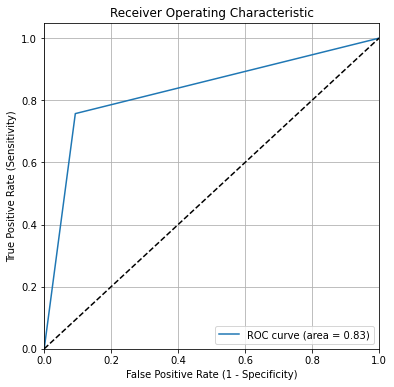

In [164]:
# Plotting ROC curve

fpr, tpr, thresholds= roc_curve(y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate = False )
auc_score= roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [165]:
# Finding optimal cut-off 

num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=  y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.114137,0,1,1,0,0,0,0,0,0,0,0
1,0,0.110472,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223635,0,1,1,1,0,0,0,0,0,0,0
3,1,0.786635,1,1,1,1,1,1,1,1,1,0,0
4,1,0.636005,1,1,1,1,1,1,1,1,0,0,0


In [166]:
df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for i in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final[i]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    df.loc[i]= [i,accuracy,sensitivity,specificity]
    
df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.726500,0.961570,0.579257
0.2,0.2,0.818296,0.908831,0.761588
0.3,0.3,0.843962,0.866312,0.829962
0.4,0.4,0.856715,0.828291,0.874520
0.5,0.5,0.849315,0.757155,0.907042
0.6,0.6,0.846166,0.713410,0.929321
0.7,0.7,0.832310,0.641047,0.952113
0.8,0.8,0.818926,0.572363,0.973367
0.9,0.9,0.774839,0.435814,0.987196


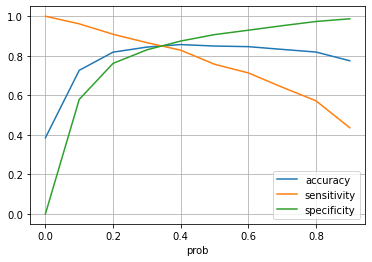

In [167]:

df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In above plot, it’s visible that 0.34 is the optimal point to set as cutoff probability for our model.

In [168]:
# Creating pred_final column and generating prediction based on probability cutoff 0.34

y_train_pred_final['pred_final']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [169]:
print('Model Evaluation Metrics on Train dataset')


TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.pred_final))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))



Model Evaluation Metrics on Train dataset
Confusion Matrix:
True Negative: 3329      False Positive: 576
False Negative: 368      True Positive: 2078 

Overall model accuracy: 0.8513619902377578
Sensitivity / Recall:  0.8495502861815208
Specificity:  0.8524967989756722
False Positive Rate:  0.1475032010243278


In [170]:
leads_score_data2=pd.read_csv("Leads.csv",sep=",",encoding='utf-8')
leads_score_data2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [171]:
# Adding lead Number in the final results dataframe
y_train_pred_final= y_train_pred_final.merge(leads_score_data2['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Train dataset
y_train_pred_final['Lead Score']= y_train_pred_final.Converted_Prob * 100
y_train_pred_final= y_train_pred_final[['Lead Number', 'Converted', 'predicted', 'Converted_Prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred_final.head(10)

,Lead Number,Converted,predicted,Converted_Prob,Lead Score
5706,606187,1,1,0.999709,99.970873
2790,632895,1,1,0.999545,99.954459
5190,610126,1,1,0.999422,99.942171
4776,614095,1,1,0.999308,99.930765
5871,604900,1,1,0.999270,99.927032
1771,642169,1,1,0.999197,99.919656
2869,632194,1,1,0.999197,99.919656
2254,637880,1,1,0.999161,99.916073
5482,607902,1,1,0.999154,99.915369
3713,624527,1,1,0.998958,99.895839


In [172]:
X_test.head(1)

,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_index,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_it_projects_management,specialization_international_business,specialization_marketing_management,specialization_media_and_advertising,specialization_not_known,specialization_not_known,specialization_operations_management,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,how_did_you_hear_about_x_education_email,how_did_you_hear_about_x_education_multiple_sources,how_did_you_hear_about_x_education_not_known,how_did_you_hear_about_x_education_not_known,how_did_you_hear_about_x_education_online_search,how_did_you_hear_about_x_education_other,how_did_you_hear_about_x_education_sms,how_did_you_hear_about_x_education_social_media,how_did_you_hear_about_x_education_student_of_someschool,how_did_you_hear_about_x_education_word_of_mouth,what_is_your_current_occupation_housewife,what_is_your_current_occupation_not_known,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,what_matters_most_to_you_in_choosing_a_course_flexibility_&_convenience,what_matters_most_to_you_in_choosing_a_course_not_known,what_matters_most_to_you_in_choosing_a_course_other,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_known,lead_quality_not_sure,lead_quality_worst,lead_profile_lateral_student,lead_profile_not_known,lead_profile_not_known,lead_profile_other_leads,lead_profile_potential_lead,lead_profile_student_of_someschool,city_not_known,city_not_known,city_other_cities,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
3271,0.290647,-0.59771,0.968264,0.912393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [176]:
test_cols= list(X_train_rfe.columns)
test_cols.remove('const')
X_test= X_test[test_cols]
X_test.head()

,total_time_spent_on_website,lead_origin_lead_add_form,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_other_activity,last_activity_sms_sent,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_known,lead_quality_not_sure,lead_quality_worst,last_notable_activity_modified,last_notable_activity_unreachable
3271,-0.597710,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,1.889329,0,0,0,0,0,0,1,0,0,0,0,0,0
7936,-0.749941,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,-0.885664,1,0,0,0,0,0,0,0,0,0,0,1,0
3830,-0.584872,0,0,0,0,0,0,0,0,1,0,0,0,0


In [177]:
X_test_final= sm.add_constant(X_test)
X_test_final.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_other_activity,last_activity_sms_sent,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_known,lead_quality_not_sure,lead_quality_worst,last_notable_activity_modified,last_notable_activity_unreachable
3271,1.0,-0.597710,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,1.0,1.889329,0,0,0,0,0,0,1,0,0,0,0,0,0
7936,1.0,-0.749941,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,1.0,-0.885664,1,0,0,0,0,0,0,0,0,0,0,1,0
3830,1.0,-0.584872,0,0,0,0,0,0,0,0,1,0,0,0,0


In [178]:
y_test_pred = res.predict(X_test_final).values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head(20)


,Converted,Converted_Prob,predicted
0,0,0.073615,0
1,1,0.994656,1
2,0,0.062998,0
3,1,0.888148,1
4,0,0.074582,0
5,1,0.911552,1
6,0,0.204789,0
7,0,0.186143,0
8,1,0.988588,1
9,0,0.249308,0


In [179]:
# Adding lead Number in the final results dataframe for test set
y_test_pred_final= y_test_pred_final.merge(leads_score_data2['Lead Number'], how= 'left', left_index= True, right_index= True)
y_test_pred_final['Lead Score']= y_test_pred_final.Converted_Prob * 100
y_test_pred_final= y_test_pred_final[['Lead Number', 'Converted', 'predicted', 'Converted_Prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_test_pred_final.head(10)

,Lead Number,Converted,predicted,Converted_Prob,Lead Score
868,651281,1,1,0.999009,99.900918
140,659123,1,1,0.998850,99.884959
655,653773,1,1,0.998850,99.884959
2565,634875,1,1,0.998709,99.870935
1582,643814,1,1,0.998587,99.858708
1963,640614,1,1,0.997345,99.734513
1525,644144,1,1,0.997254,99.725410
2055,639824,1,1,0.997221,99.722081
1786,642069,1,1,0.997011,99.701112
619,654027,1,1,0.996916,99.691576


In [180]:
print('Model Evaluation Metrics on Test dataset')


TN,FP,FN,TP= confusion_matrix(y_true= y_test_pred_final.Converted, y_pred= y_test_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


print('Overall model accuracy:', accuracy_score(y_true= y_test_pred_final.Converted, y_pred= y_test_pred_final.predicted))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))

Model Evaluation Metrics on Test dataset
Confusion Matrix:
True Negative: 1574      False Positive: 160
False Negative: 263      True Positive: 726 

Overall model accuracy: 0.8446566287183254
Sensitivity / Recall:  0.7340748230535895
Specificity:  0.9077277970011534
False Positive Rate:  0.0922722029988466
